# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

#### Выгрузка данных в датафрейм

In [167]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [168]:
df = pd.read_csv(r"C:\Users\danii\projects\project_yandex_real_estate\real_estate_data.csv", sep = '\t' )
df.head(50)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


#### Общая информация о известных данных, загруженных в датафрейм:

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

#### Построение общей гистограммы для всех числовых столбцов таблицы: 

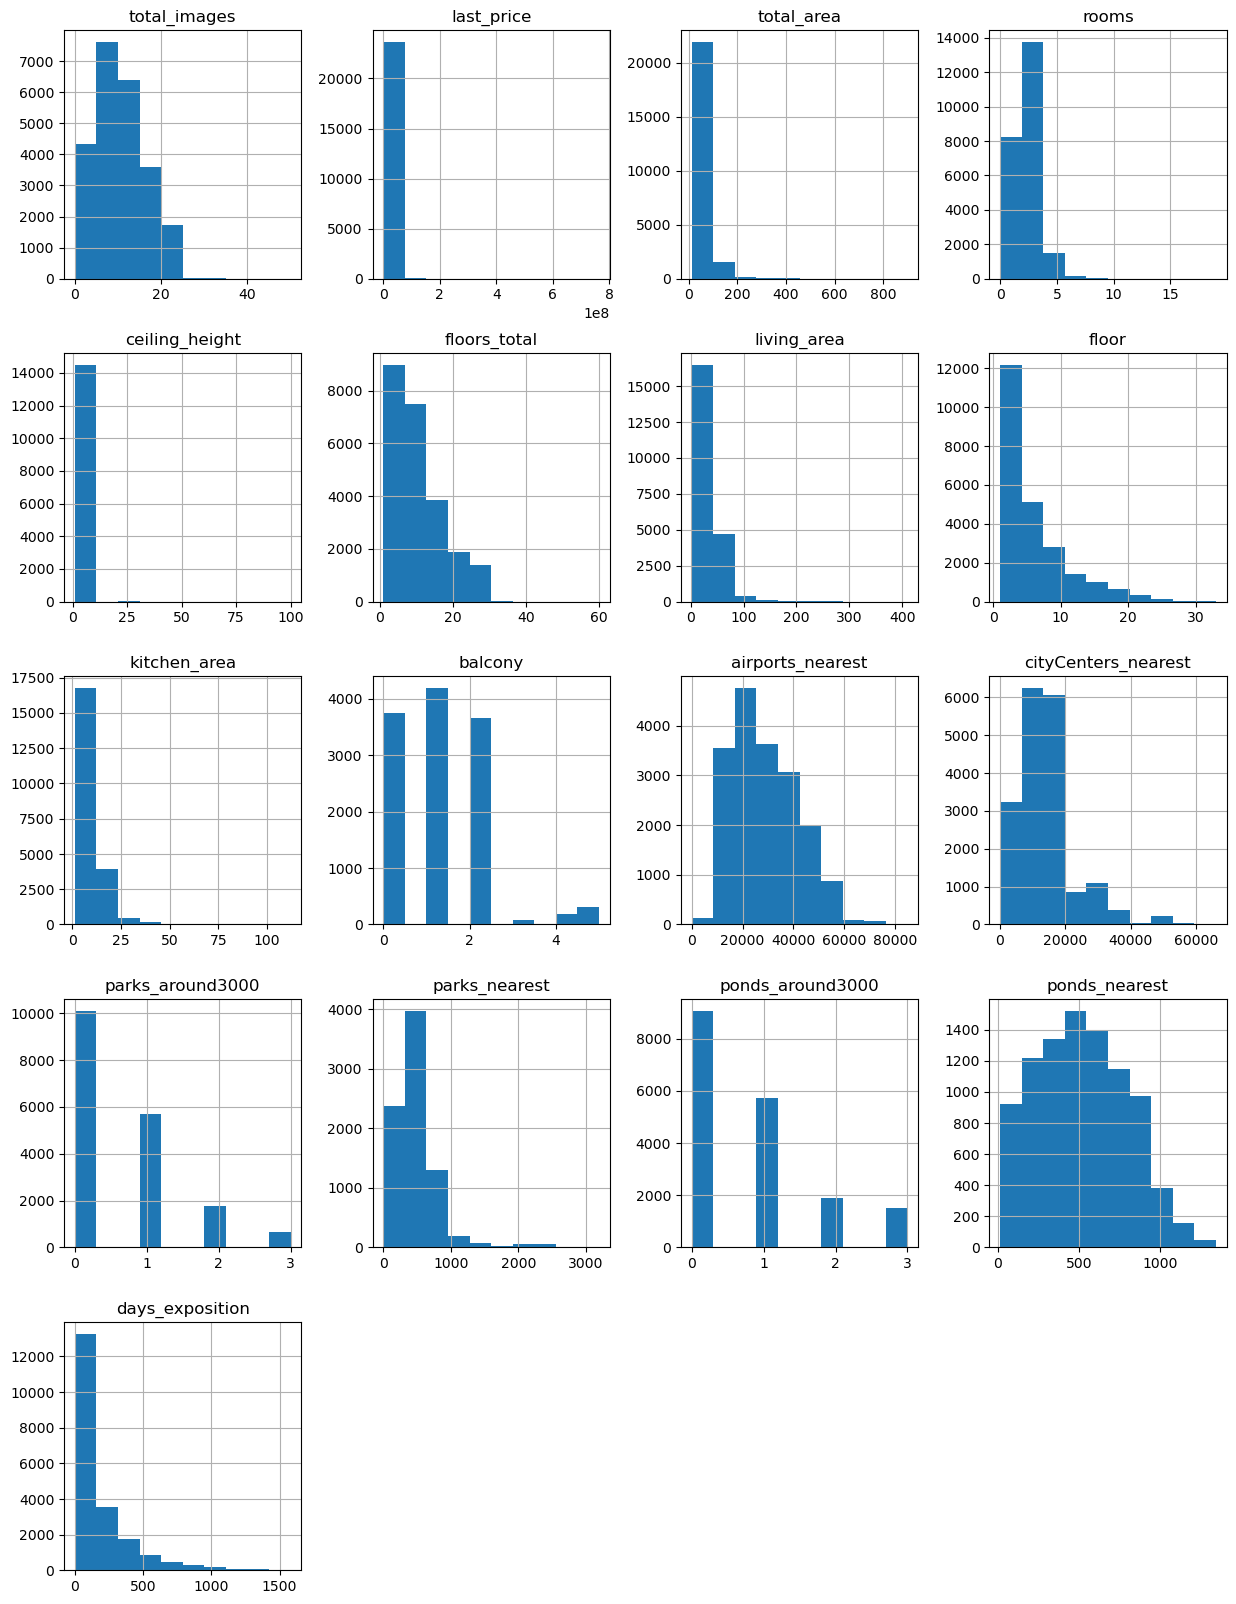

In [170]:
df.hist(figsize=(15, 20));

### Предобработка данных

#### Для грамотного отображения данных необходимо изменить регистр в именах стобцов:

In [171]:
df.columns = df.columns.str.lower()

#### Поиск неявных дубликатов и заполнение пропусков в стобце с названиями населенных пунктов.

Зависимость названия городов и поселков от имеющихся данных отсутствует, для дальнейшей работы с данными заполняем пропущенные значения словом "неизвестно":

In [172]:
df['locality_name'] = df['locality_name'].fillna('неизвестно')


Вывод уникальных значений названия населенных пунктов для обнаружения неявных дубликатов:

In [173]:
sorted(df['locality_name'].unique())

['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское',
 'городск

Фильтрация названий поселков:

In [174]:
town = (['посёлок ', 'городской ', 'деревня ', 'поселок ', 'садовое товарищество ', 'городского типа ', 'коттеджный ',
'пансионат ', 'Пансионат ', 'село ', 'садоводческое некоммерческое товарищество ', 'при железнодорожной ', 'станции '])
for value in town:
    df['locality_name'] = df['locality_name'].str.replace(value, '')
print((sorted(df['locality_name'].unique())))

['Агалатово', 'Александровская', 'Алексеевка', 'Аннино', 'Аро', 'Барышево', 'Батово', 'Бегуницы', 'Белогорка', 'Белоостров', 'Бокситогорск', 'Большая Вруда', 'Большая Ижора', 'Большая Пустомержа', 'Большие Колпаны', 'Большое Рейзино', 'Большой Сабск', 'Бор', 'Борисова Грива', 'Бугры', 'Будогощь', 'Ваганово', 'Важины', 'Вартемяги', 'Вахнова Кара', 'Вещево', 'Виллози', 'Вознесенье', 'Возрождение', 'Войсковицы', 'Войскорово', 'Володарское', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг', 'Вырица', 'Выскатка', 'Высокоключевой', 'Высоцк', 'Гаврилово', 'Гарболово', 'Гатчина', 'Гладкое', 'Глажево', 'Глебычево', 'Глинка', 'Гончарово', 'Горбунки', 'Гостилицы', 'Громово', 'Дзержинского', 'Дружная Горка', 'Дружноселье', 'Дубровка', 'Елизаветино', 'Ефимовский', 'Жилгородок', 'Жилпосёлок', 'Житково', 'Заводской', 'Заклинье', 'Заневка', 'Запорожское', 'Зеленогорск', 'Зелёный Бор', 'Зимитицы', 'Ивангород', 'Извара', 'Ильичёво', 'Иссад', 'Калитино', 'Каложицы', 'Кальтино', 'Каменногорск', 'Камышовка', '

#### Поиск явных дубликатов:

In [175]:
df[['total_area', 'floor', 'floors_total', 'citycenters_nearest', 'locality_name', 'rooms']].duplicated().sum()

210

In [176]:
df = df.drop_duplicates(['total_area', 'floor', 'floors_total', 'citycenters_nearest', 'locality_name', 'rooms']).reset_index(drop=True)

#### Для обнаружения аномальных значчений выводим максимальные и минимальные значения по каждому из столбцов:

In [177]:
for col_name, data in df.items():
    print(f'{col_name}: \n макс: {data.max()} \n мин: {data.min()}')


total_images: 
 макс: 50 
 мин: 0
last_price: 
 макс: 763000000.0 
 мин: 12190.0
total_area: 
 макс: 900.0 
 мин: 12.0
first_day_exposition: 
 макс: 2019-05-03T00:00:00 
 мин: 2014-11-27T00:00:00
rooms: 
 макс: 19 
 мин: 0
ceiling_height: 
 макс: 100.0 
 мин: 1.0
floors_total: 
 макс: 60.0 
 мин: 1.0
living_area: 
 макс: 409.7 
 мин: 2.0
floor: 
 макс: 33 
 мин: 1
is_apartment: 
 макс: True 
 мин: False
studio: 
 макс: True 
 мин: False
open_plan: 
 макс: True 
 мин: False
kitchen_area: 
 макс: 112.0 
 мин: 1.3
balcony: 
 макс: 5.0 
 мин: 0.0
locality_name: 
 макс: неизвестно 
 мин: Агалатово
airports_nearest: 
 макс: 84869.0 
 мин: 0.0
citycenters_nearest: 
 макс: 65968.0 
 мин: 181.0
parks_around3000: 
 макс: 3.0 
 мин: 0.0
parks_nearest: 
 макс: 3190.0 
 мин: 1.0
ponds_around3000: 
 макс: 3.0 
 мин: 0.0
ponds_nearest: 
 макс: 1344.0 
 мин: 13.0
days_exposition: 
 макс: 1580.0 
 мин: 1.0


Обнаружены аномально высокие значения в столбце "высота потолка", выводим уникальные значения столбца для анализа:

In [178]:
df['ceiling_height'].value_counts().tail(52)

32.00     2
2.25      1
3.69      1
3.76      1
2.34      1
3.29      1
4.25      1
1.75      1
3.88      1
5.60      1
4.14      1
20.00     1
22.60     1
6.00      1
3.82      1
2.89      1
3.58      1
5.80      1
27.50     1
2.49      1
4.90      1
3.48      1
10.30     1
1.00      1
100.00    1
14.00     1
2.20      1
2.99      1
5.50      1
4.37      1
4.15      1
3.44      1
5.20      1
26.00     1
1.20      1
8.30      1
3.68      1
4.80      1
3.87      1
3.84      1
3.42      1
3.83      1
3.43      1
4.30      1
3.39      1
3.98      1
4.65      1
5.00      1
24.00     1
4.06      1
3.93      1
3.59      1
Name: ceiling_height, dtype: int64

Некоторые значения превышают 10, 20 м. Такие аномально высокие значения предположительно обусловлены человеческим фактором: ошибка в запятой при заполнении данных. Исправление данных:

In [179]:
def div(h):
    try:
        if h > 10:
            return h / 10
        else:
            return h
    except:
        return h
df['ceiling_height'] = df['ceiling_height'].apply(div)   

Аномальные значения в столбце "цена". Выводим уникальные значения для анализа:

In [180]:
df['last_price'].sort_values()

8766         12190.0
17343       430000.0
14830       430000.0
16175       440000.0
17560       450000.0
            ...     
15559    300000000.0
1435     330000000.0
14628    401300000.0
19397    420000000.0
12905    763000000.0
Name: last_price, Length: 23489, dtype: float64

Анамально низкое значение 12190, предполагаем, что здесь ошибка, исправляем как неизвестное значение:

In [181]:
df.loc[df['last_price'] == 12190, 'last_price'] = np.nan

#### Заполнение пропущенных значений.

Вывод пропущенных значений по всем столбцам:

In [182]:
df.isna().sum()

total_images                0
last_price                  1
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9096
floors_total               86
living_area              1875
floor                       0
is_apartment            20745
studio                      0
open_plan                   0
kitchen_area             2250
balcony                 11413
locality_name               0
airports_nearest         5393
citycenters_nearest      5370
parks_around3000         5369
parks_nearest           15434
ponds_around3000         5369
ponds_nearest           14409
days_exposition          3143
dtype: int64

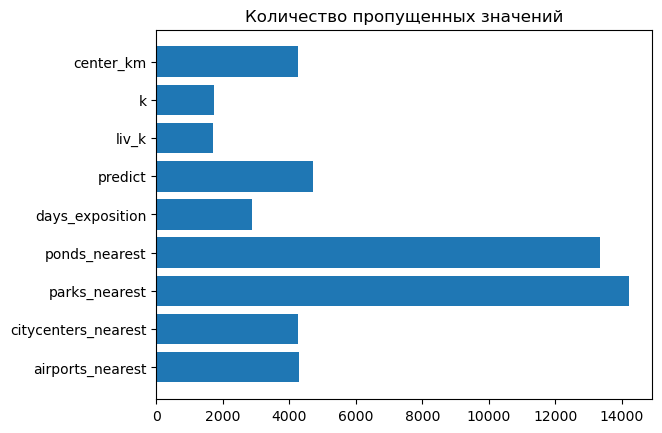

In [183]:
plt.barh(a[a['value'] != 0].index, a.loc[a['value'] != 0, 'value'])
plt.title('Количество пропущенных значений')
plt.show()

##### Заполнение пропусков в высоте потолков

Проверям гипотезу о наличии взаимосвязи высоты потолков в квартирах и отдаленности от центра города в Санкт-Петербурге:

In [184]:
df.query('locality_name == "Санкт-Петербург"')['citycenters_nearest'].corr(df['ceiling_height'])

-0.5218856821129424

Заполняем пропуски значениями, предсказанными по модели линейной регрессии:

In [186]:
from sklearn.linear_model import LinearRegression

In [187]:
x = np.array(df.loc[(df['locality_name'] == 'Санкт-Петербург')
                    & (~df['ceiling_height'].isna())
                    & (~df['citycenters_nearest'].isna()), 'citycenters_nearest']).reshape((-1, 1))
y = np.array(df.loc[(df['locality_name'] == 'Санкт-Петербург')
                    & (~df['ceiling_height'].isna())
                    & (~df['citycenters_nearest'].isna()), 'ceiling_height'])

In [188]:
model = LinearRegression().fit(x, y)
df['predict'] = model.intercept_ + model.coef_ * df['citycenters_nearest']
q = df.loc[df['locality_name'] == 'Санкт-Петербург', 'ceiling_height'].median()
def height(row):
    if (np.math.isnan(row['ceiling_height']) and (row['locality_name'] == 'Санкт-Петербург')
       and row['predict'] >= q):
        return row['predict']
    else:
        return row['ceiling_height']
df['ceiling_height'] = df.apply(height, axis = 1)
        

Оставшиеся пропуски заполняем медианными значениями, взятыми по населенным пунктам:

In [190]:
h = df.groupby('locality_name')['ceiling_height'].median()

In [191]:
def f(row):
     if np.math.isnan(row['ceiling_height']):
        return h[row['locality_name']] 
     else:
        return row['ceiling_height'] 
df['ceiling_height'] = df.apply(f, axis = 1)

##### Заполняем пропуски в столбце "Количество этажей" . 

Заполняем медианным значением, взятым для каждого населенного пункта с учетом того, что количество этажей не должно быть меньше этажа квартиры:

In [192]:
c = df.groupby('locality_name')['floors_total'].median()
def count_floor(row):
    if np.math.isnan(row['floors_total']) and (c[row['locality_name']] > row['floor']):
        return c[row['locality_name']] 
    else:
        return row['floors_total']
df['floors_total'] = df.apply(count_floor, axis = 1)

Оставшиеся пропуски заполняем медианным значением:

In [193]:
l = df['floors_total'].median()
def count_floor2(row):
    if np.math.isnan(row['floors_total']) and (l > row['floor']):
        return c[row['locality_name']] 
    else:
        return row['floors_total']
df['floors_total'] = df.apply(count_floor2, axis = 1)

Оставшиеся пропуски удаляем:

In [194]:
df = df.dropna(subset = ['floors_total'])

##### Заполнение пропусков в столбце "Жилая площадь".

Пропуски в столбце "Жилая площадь" заполняем по медианым значениям пропорции от общей площади взятым по количеству комнат без учета студий и квартир с открытой планировкой:

In [195]:
df['liv_k'] = df['living_area'] / df['total_area']

C:\Users\danii\AppData\Local\Temp\ipykernel_12968\2161439936.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['liv_k'] = df['living_area'] / df['total_area']


In [196]:
livr = df.groupby('rooms')['liv_k'].median()
livr

rooms
0     0.689655
1     0.482302
2     0.584906
3     0.631579
4     0.659740
5     0.651943
6     0.679605
7     0.681670
8     0.688475
9     0.628251
10    0.653103
11    0.710093
12    0.455222
14    0.648695
15    0.693220
16    0.666667
19    0.706086
Name: liv_k, dtype: float64

In [197]:
def liv_area(row):
    if (np.math.isnan(row['living_area'])) and (row['studio'] == False) and (row['open_plan'] == False):
        return livr[row['rooms']] * row['total_area']
    else:
        return row['living_area']
df['living_area'] = df.apply(liv_area, axis = 1)

C:\Users\danii\AppData\Local\Temp\ipykernel_12968\2312840943.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['living_area'] = df.apply(liv_area, axis = 1)


Для студий определяем медианное значение площади квартиры без жилой площади:

In [198]:
def san(row):
    try:
        return row['total_area'] - row['living_area']
    except:
        return np.nan
studio = df[df['studio'] == True].apply(san, axis = 1).median()

Заполням пропуски в столбце "Жилая площадь" для студий как разницу между общей площадью и медианным значением оставшей части квартиры:

In [199]:
def living_area2(row):
    if np.math.isnan(row['living_area']):
        return row['total_area'] - studio
    else:
        return row['living_area']
df['living_area'] = df.apply(living_area2, axis = 1)

C:\Users\danii\AppData\Local\Temp\ipykernel_12968\2816789925.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['living_area'] = df.apply(living_area2, axis = 1)


##### Заполнение пропусков в стобце "Площадь кухни" .

Определяем коэффициент пропорции для части квартиры  без жилой площади:

In [200]:
def k(row):
    try:
        return row['kitchen_area'] / (row['total_area'] - row['living_area'])
    except:
        return np.nan
df['k'] = df.apply(k, axis = 1)

C:\Users\danii\AppData\Local\Temp\ipykernel_12968\3105032097.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['k'] = df.apply(k, axis = 1)


In [201]:
kr = df.groupby('rooms')['k'].median()
kr

rooms
0          NaN
1     0.473684
2     0.400000
3     0.360000
4     0.340909
5     0.310071
6     0.314286
7     0.298476
8     0.356164
9     0.133477
10    0.298211
11    0.239505
12    0.228432
14    0.226829
15    0.552486
16    0.144444
19    0.250681
Name: k, dtype: float64

In [202]:
def kit(row):
    if np.math.isnan(row['kitchen_area']) and (row['studio'] == False) and (row['open_plan'] == False):
        kitchen = kr[row['rooms']] * (row['total_area'] - row['living_area'])
        if kitchen >= 5:
            return kitchen
        else:
            return row['kitchen_area']
    else:
        return row['kitchen_area']
df.loc[:,'kitchen_area'] = df.apply(kit, axis = 1)

C:\Users\danii\AppData\Local\Temp\ipykernel_12968\1251838331.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'kitchen_area'] = df.apply(kit, axis = 1)


##### Заполнение пропусков в графе "Аппартаменты" .

Заполняем значением False, так как предполагаем, что при заполнении формы люди не отмечали данный пункт, если жил. площадь не являлась аппартаментами:

In [203]:
df['is_apartment'] = df['is_apartment'].fillna(False)

C:\Users\danii\AppData\Local\Temp\ipykernel_12968\3262889080.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_apartment'] = df['is_apartment'].fillna(False)


##### Заполнение пропусков столбце "Площадь балкона" . 

Заполняем значением 0, так как предполагаем, что балкон в таком случае отсутствует:

In [204]:
df['balcony'] = df['balcony'].fillna(0)

C:\Users\danii\AppData\Local\Temp\ipykernel_12968\193950032.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['balcony'] = df['balcony'].fillna(0)


##### Заполнение пропусков в столбце "Расстояние до аэропорта" .

Заполняем медианными значениями, взятым по населенным пунктам:

In [205]:
air = df.groupby('locality_name')['airports_nearest'].describe()

In [206]:
def airnear(row):
    if ((np.math.isnan(row['airports_nearest']) and 
        ((air.loc[row['locality_name'], '75%'] - air.loc[row['locality_name'], '25%']) <= 5))):
        try:
            return air.loc[row['locality_name'], '50%']
        except:
            return row['airports_nearest']
    else:
        return row['airports_nearest']
df['airports_nearest'] = df.apply(airnear, axis = 1)

C:\Users\danii\AppData\Local\Temp\ipykernel_12968\3154401263.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['airports_nearest'] = df.apply(airnear, axis = 1)


##### Заполнение пропусков в столбце "Расстояние до центра".

Заполняем медианными значениями, взятым по населенным пунктам:

In [207]:
cent = df.groupby('locality_name')['citycenters_nearest'].describe() 

In [208]:
def center(row):
    if ((np.math.isnan(row['citycenters_nearest']) and 
        ((cent.loc[row['locality_name'], '75%'] - cent.loc[row['locality_name'], '25%']) <= 5))):
        try:
            return cent.loc[row['locality_name'], '50%']
        except:
            return row['citycenters_nearest']
    else:
        return row['citycenters_nearest']
df['citycenters_nearest'] = df.apply(center, axis = 1)

C:\Users\danii\AppData\Local\Temp\ipykernel_12968\283396650.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['citycenters_nearest'] = df.apply(center, axis = 1)


##### Заполнение пропусков в стобце "Количество парков в радиусе 3 км".  

Заполняем значением 0, предполагаем что в таком случае прки отсутствуют:

In [209]:
df['parks_around3000'] = df['parks_around3000'].fillna(0)

C:\Users\danii\AppData\Local\Temp\ipykernel_12968\2073338058.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['parks_around3000'] = df['parks_around3000'].fillna(0)


##### Заполнение пропусков  в стобце "Количество прудов в радиусе 3 км".

Аналогично заполняем пропуски:

In [210]:
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)

C:\Users\danii\AppData\Local\Temp\ipykernel_12968\62664835.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ponds_around3000'] = df['ponds_around3000'].fillna(0)


Взаимосвязь между значениями в столбцах "Расстояние до парка", "Расстояние до пруда", "Cколько дней было размещено объявление" и другими значениями не обнаружена, количество пропусков слишком велико, чтобы заполнять их медианными значениями, поэтому пропуски в данных стобцах оставляем без изменений.

#### Перевод данных к необходимому формату.


Перевод данных в стобце "Первый день публикации" к необходимому формату:

In [211]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')

C:\Users\danii\AppData\Local\Temp\ipykernel_12968\2439300408.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')


Перевод данных в стобце "Балконы" к необходимому формату:

In [212]:
df['balcony'] = df['balcony'].astype('int')

C:\Users\danii\AppData\Local\Temp\ipykernel_12968\4166074088.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['balcony'] = df['balcony'].astype('int')


Перевод данных в стобце "Количество этажей" к необходимому формату:

In [213]:
df['floors_total'] = df['floors_total'].astype('int')

C:\Users\danii\AppData\Local\Temp\ipykernel_12968\2834216931.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['floors_total'] = df['floors_total'].astype('int')


#### Удаление строк с редкими и выбивающимися значениями:

In [214]:
len(df)

23452

Фильтрация по количеству комнат:

In [215]:
df = df[df['rooms'] <= 8]

In [216]:
len(df)

23433

Фильтрация по общей площади:

In [217]:
df = df[(df['total_area'] >= 20) & (df['total_area'] <= 250)]

In [218]:
len(df)

23307

Фильтрация по высоте потолков:

In [219]:
df = df[(df['ceiling_height'] >= 2.20) & (df['ceiling_height'] <=3.7)]

In [220]:
len(df)

23044

Фильтрация по количеству дней:

In [221]:

df = df[((df['days_exposition'] >= 3) & (df['days_exposition'] <= 1200)) | (df['days_exposition'].isna())]

In [222]:
len(df)

22953

Фильтрация по цене:

In [223]:
df = df[(df['last_price'] >= 1000000) & (df['last_price'] <= 80000000)]

In [224]:
len(df)

22758

Фильтрация по жилой площади:

In [225]:
df = df[(df['living_area'] >= 9) & (df['living_area'] <= 124)]

In [226]:
len(df)

22643

Фильтрация по площади кухни:

In [227]:
df = df[(df['kitchen_area'] >= 5) & (df['kitchen_area'] <= 60)]

In [228]:
len(df)

22183

Фильтрация по этажу квартиры:

In [229]:
df = df[(df['floor'] >= 1) & (df['floor'] <= 26)]

In [230]:
len(df)

22167

Фильтрация количеству этажей:

In [231]:
df = df[(df['floors_total'] >= 1) & (df['floors_total'] <= 26)]

In [232]:
len(df)

21979

### Посчитайте и добавьте в таблицу новые столбцы

#### Создаем новый стобец и определяем цену за 1 м2:

In [233]:
df['price_1m2'] = df['last_price'] / df['total_area']

#### Создаем новый стобец и определяем день недели, когда было размещено объявление:

In [234]:
from datetime import datetime 

In [235]:
df['week_day'] = df['first_day_exposition'].dt.weekday

#### Создаем новый стобец и определяем месяц, когда было размещено объявление:

In [236]:
df['month'] = df['first_day_exposition'].dt.month

#### Создаем новый стобец и определяем год, когда было размещено объявление:

In [237]:
df['year'] = df['first_day_exposition'].dt.year

#### Создаем новый стобец и определяем тип этажа квартиры:

In [238]:
def typefloor(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    elif np.math.isnan(row['floor']):
        return np.nan
    elif (row['floor']) <= 0:
        return np.nan
    else:
        return 'другой'
df['type_floor'] = df.apply(typefloor, axis = 1)

#### Создаем новый стобец и определяем расстояние до центра в км2:

In [239]:
df['center_km'] = (df['citycenters_nearest'] / 1000).round()

In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21979 entries, 0 to 23488
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21979 non-null  int64         
 1   last_price            21979 non-null  float64       
 2   total_area            21979 non-null  float64       
 3   first_day_exposition  21979 non-null  datetime64[ns]
 4   rooms                 21979 non-null  int64         
 5   ceiling_height        21979 non-null  float64       
 6   floors_total          21979 non-null  int32         
 7   living_area           21979 non-null  float64       
 8   floor                 21979 non-null  int64         
 9   is_apartment          21979 non-null  bool          
 10  studio                21979 non-null  bool          
 11  open_plan             21979 non-null  bool          
 12  kitchen_area          21979 non-null  float64       
 13  balcony         

### Проведите исследовательский анализ данных

#### Построение гистограмы и числового описания распределения следующих параметров:

-общая площадь;

-жилая площадь;

-площадь кухни;

-цена объекта;

-количество комнат;

-высота потолков;

-этаж квартиры;

-тип этажа квартиры;

-общее количество этажей в доме;

-расстояние до центра города;

-расстояние до ближайшего аэропорта;

-расстояние до ближайшего парка;

-день и месяц публикации объявления.

In [241]:
import matplotlib.pyplot as plt

In [242]:
zag = np.array(['Общая площадь', 'Жилая площадь', 'Площадь кухни', 'Цена', 'Количество комнат',
                 'Высота потолка', 'Этаж', 'Всего этажей', 'Расстояние до центра города', 'Расстояние до аэропорта',
                'Расстояние до ближайшего парка'])
zag = pd.Series(zag, index=['total_area','living_area','kitchen_area','last_price', 
                             'rooms','ceiling_height','floor','floors_total',
                           'citycenters_nearest','airports_nearest','parks_nearest'])

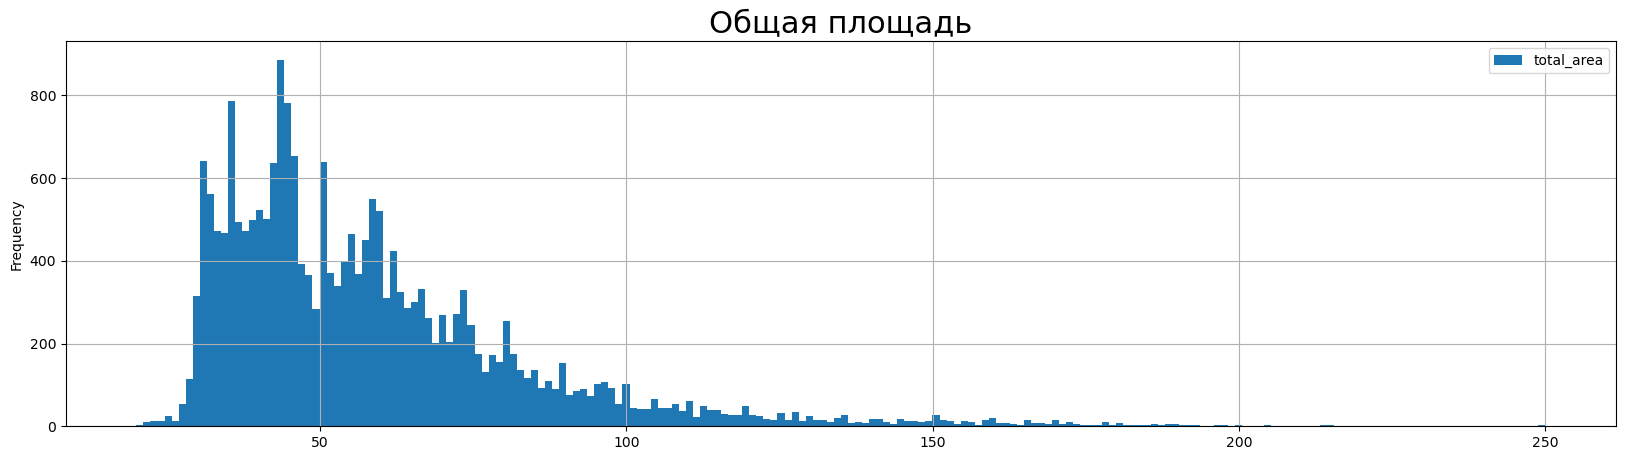

count    21979.000000
mean        58.681401
std         26.092721
min         20.000000
25%         40.800000
50%         52.200000
75%         69.200000
max        250.000000
Name: total_area, dtype: float64 

Большая часть значений лежит в диапазоне от 41.0 до 69.0;
Встречаются выбросы, со значениями больше 112.0


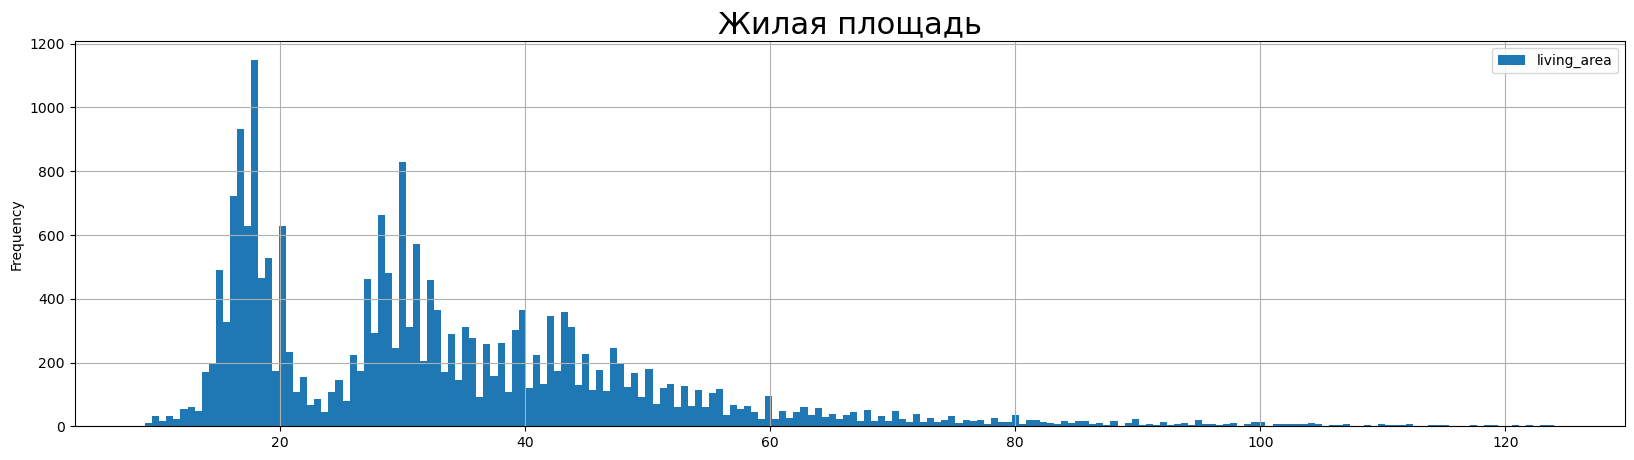

count    21979.000000
mean        33.534238
std         17.077470
min          9.000000
25%         19.000000
50%         30.100000
75%         42.200000
max        124.000000
Name: living_area, dtype: float64 

Большая часть значений лежит в диапазоне от 19.0 до 42.0;
Встречаются выбросы, со значениями больше 77.0


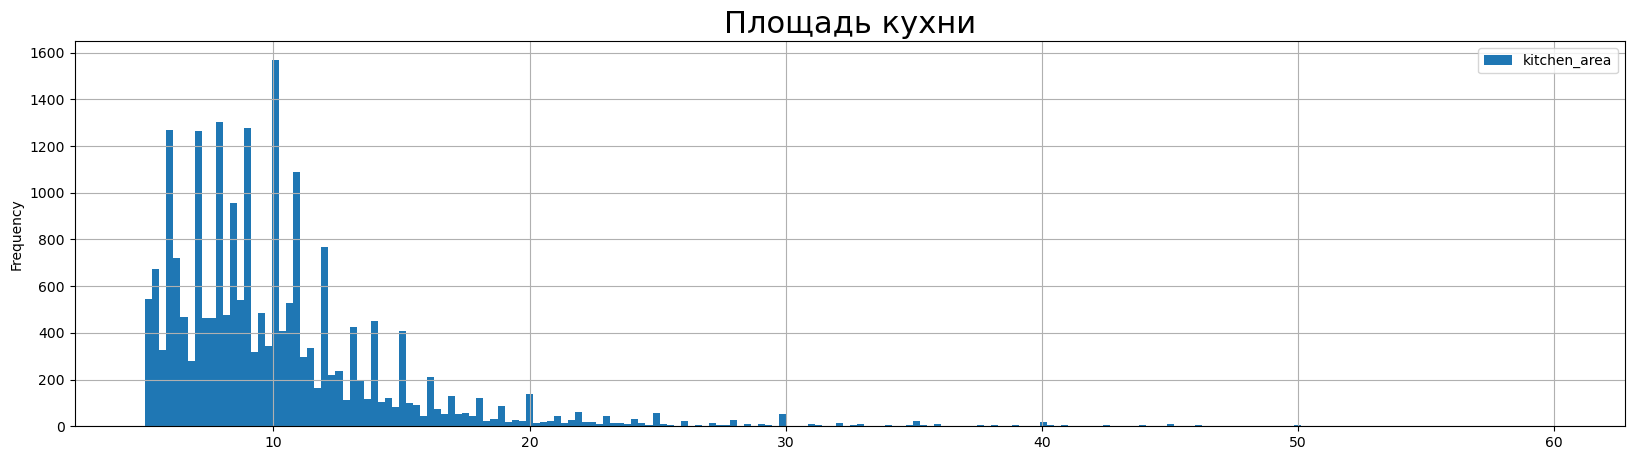

count    21979.000000
mean        10.341543
std          5.033653
min          5.000000
25%          7.100000
50%          9.100000
75%         11.770818
max         60.000000
Name: kitchen_area, dtype: float64 

Большая часть значений лежит в диапазоне от 7.0 до 12.0;
Встречаются выбросы, со значениями больше 19.0


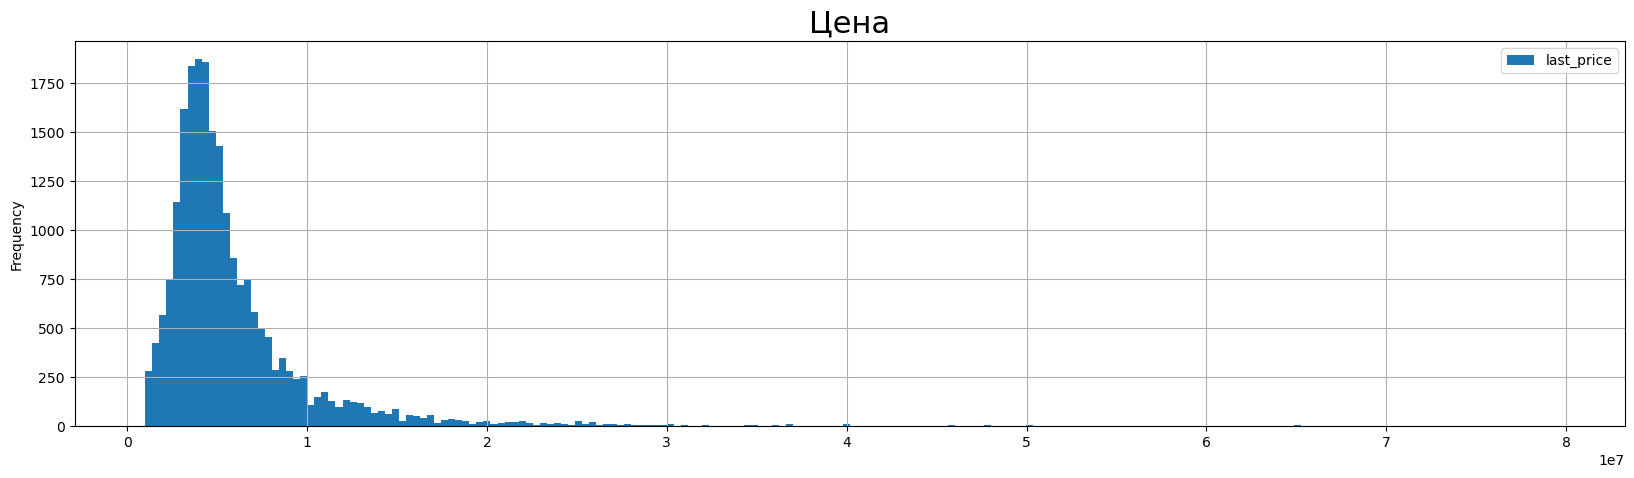

count    2.197900e+04
mean     6.034668e+06
std      5.091180e+06
min      1.000000e+06
25%      3.500000e+06
50%      4.700000e+06
75%      6.722500e+06
max      7.933900e+07
Name: last_price, dtype: float64 

Большая часть значений лежит в диапазоне от 3500000.0 до 6722500.0;
Встречаются выбросы, со значениями больше 11556250.0


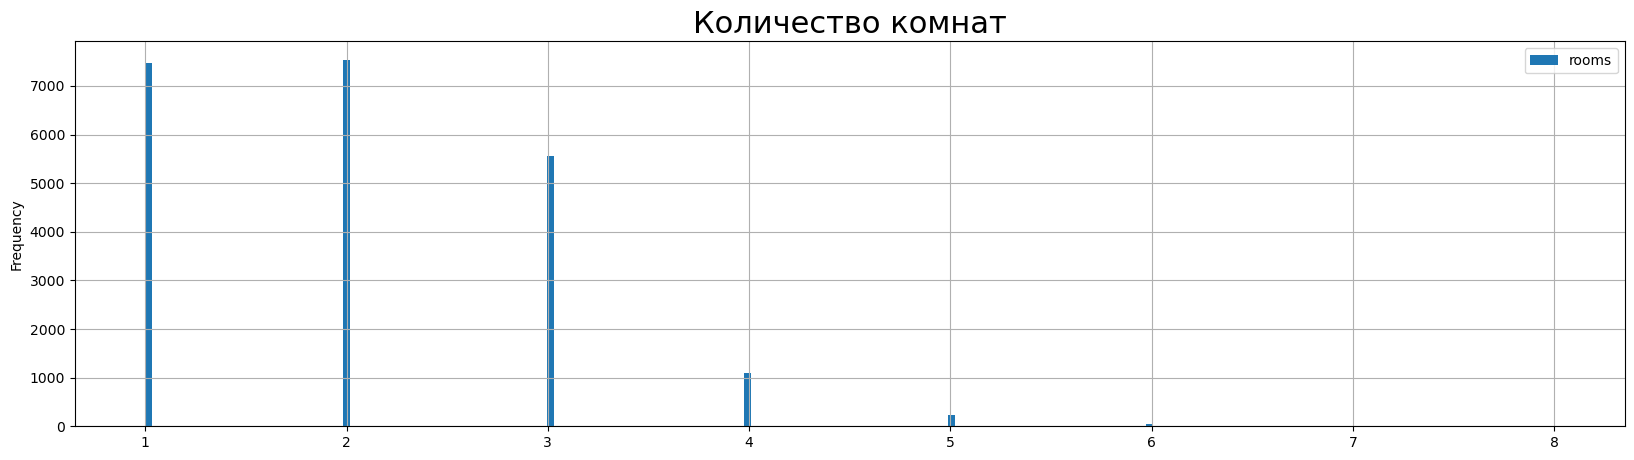

count    21979.000000
mean         2.059284
std          0.971375
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          8.000000
Name: rooms, dtype: float64 

Большая часть значений лежит в диапазоне от 1.0 до 3.0;
Встречаются выбросы, со значениями больше 6.0


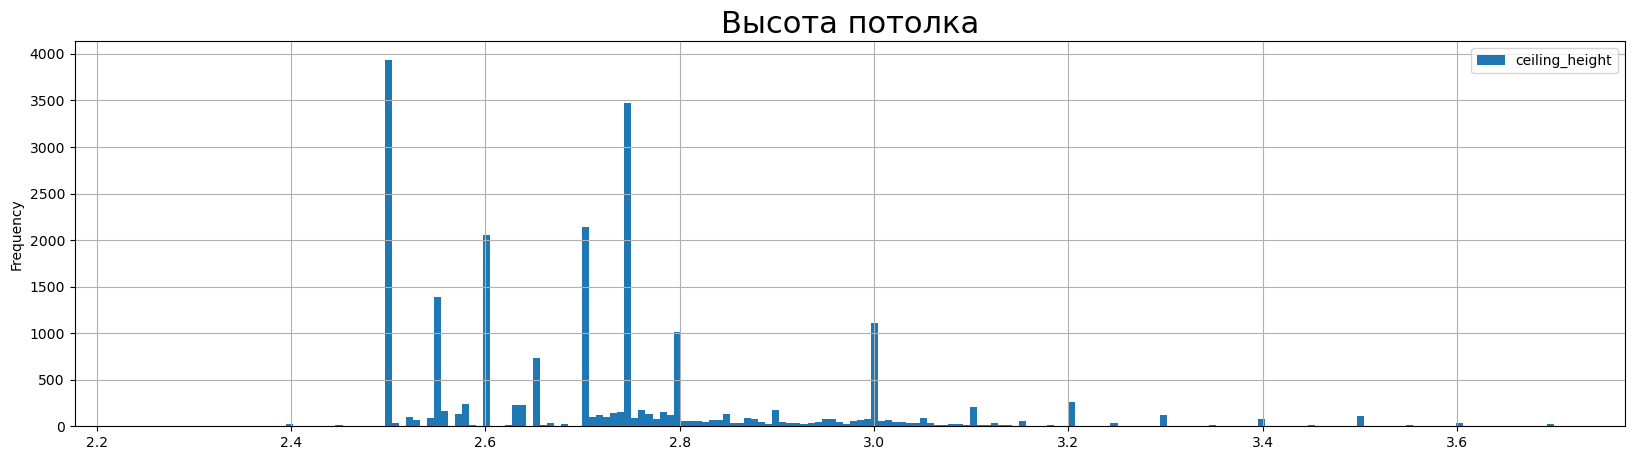

count    21979.000000
mean         2.720116
std          0.202381
min          2.250000
25%          2.550000
50%          2.700000
75%          2.791780
max          3.700000
Name: ceiling_height, dtype: float64 

Большая часть значений лежит в диапазоне от 2.55 до 2.79;
Встречаются выбросы, со значениями больше 3.15


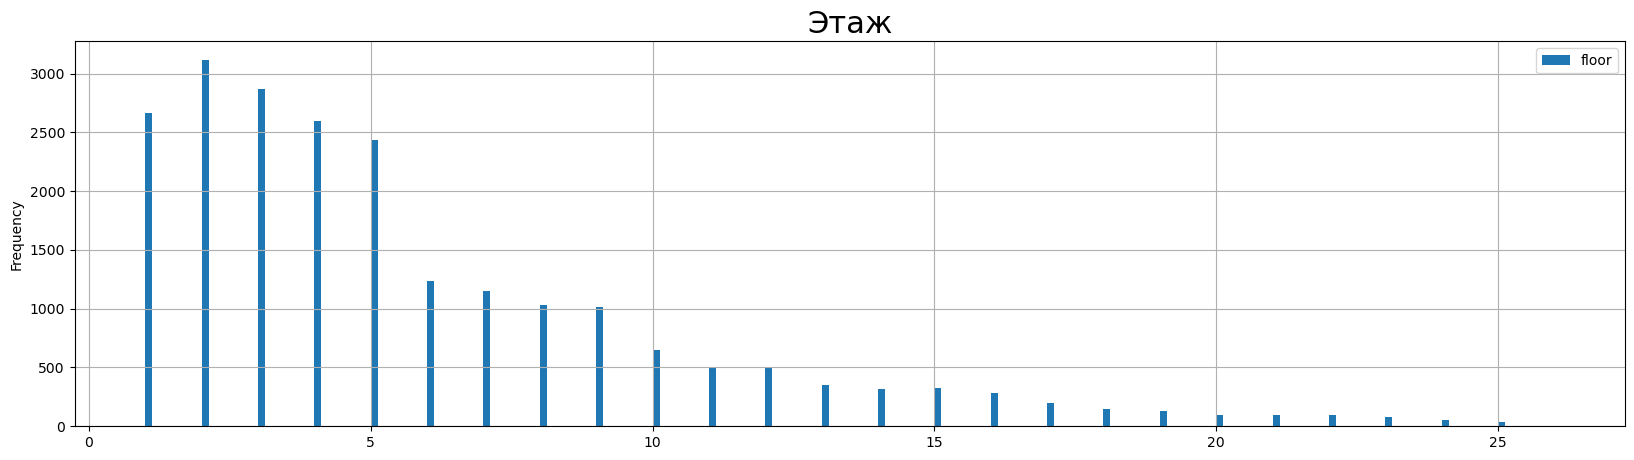

count    21979.000000
mean         5.822285
std          4.718907
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         26.000000
Name: floor, dtype: float64 

Большая часть значений лежит в диапазоне от 2.0 до 8.0;
Встречаются выбросы, со значениями больше 17.0


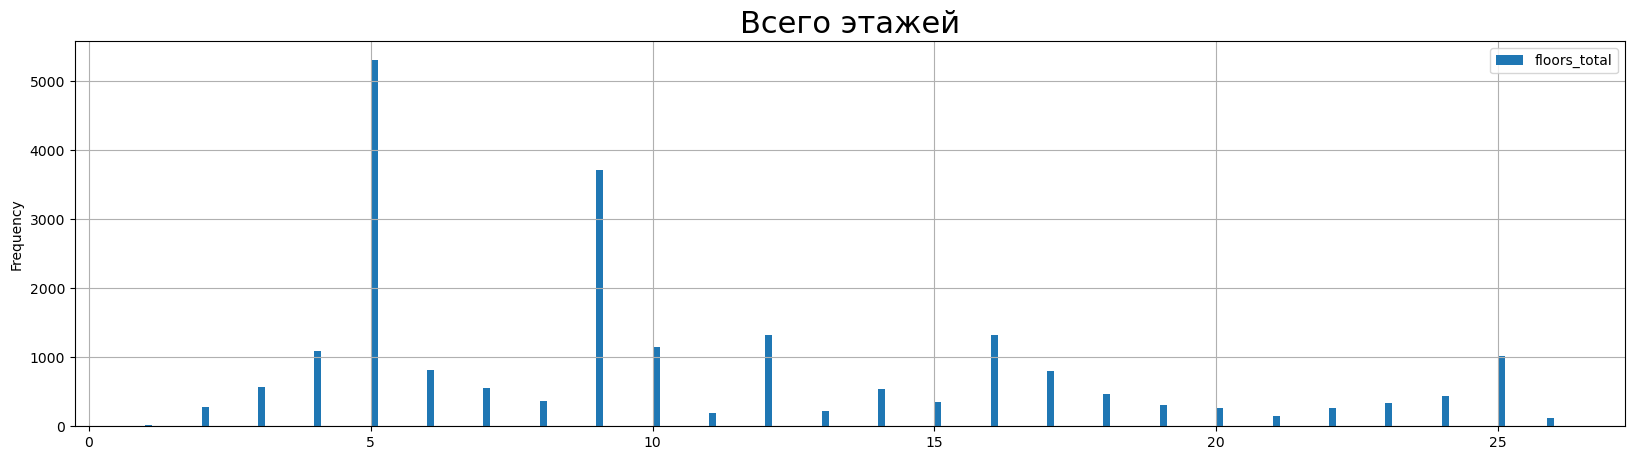

count    21979.000000
mean        10.621502
std          6.343937
min          1.000000
25%          5.000000
50%          9.000000
75%         15.000000
max         26.000000
Name: floors_total, dtype: float64 

Большая часть значений лежит в диапазоне от 5.0 до 15.0;


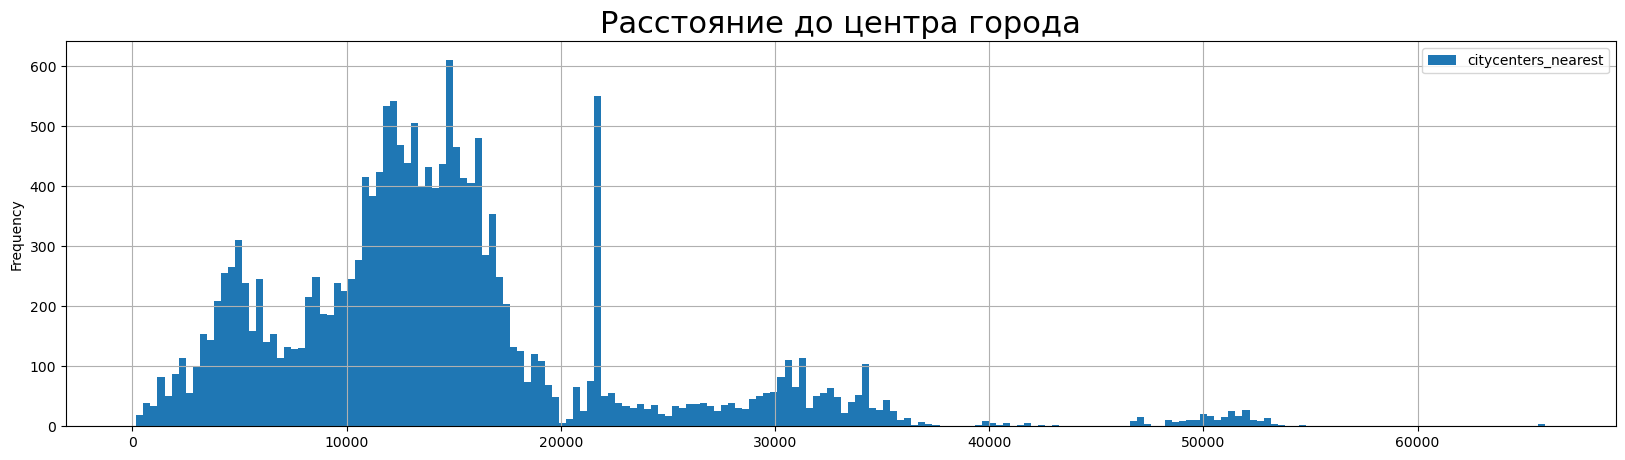

count    17655.000000
mean     14539.852053
std       8577.792579
min        181.000000
25%       9700.000000
50%      13296.000000
75%      16665.500000
max      65968.000000
Name: citycenters_nearest, dtype: float64 

Большая часть значений лежит в диапазоне от 9700.0 до 16666.0;
Встречаются выбросы, со значениями больше 27114.0


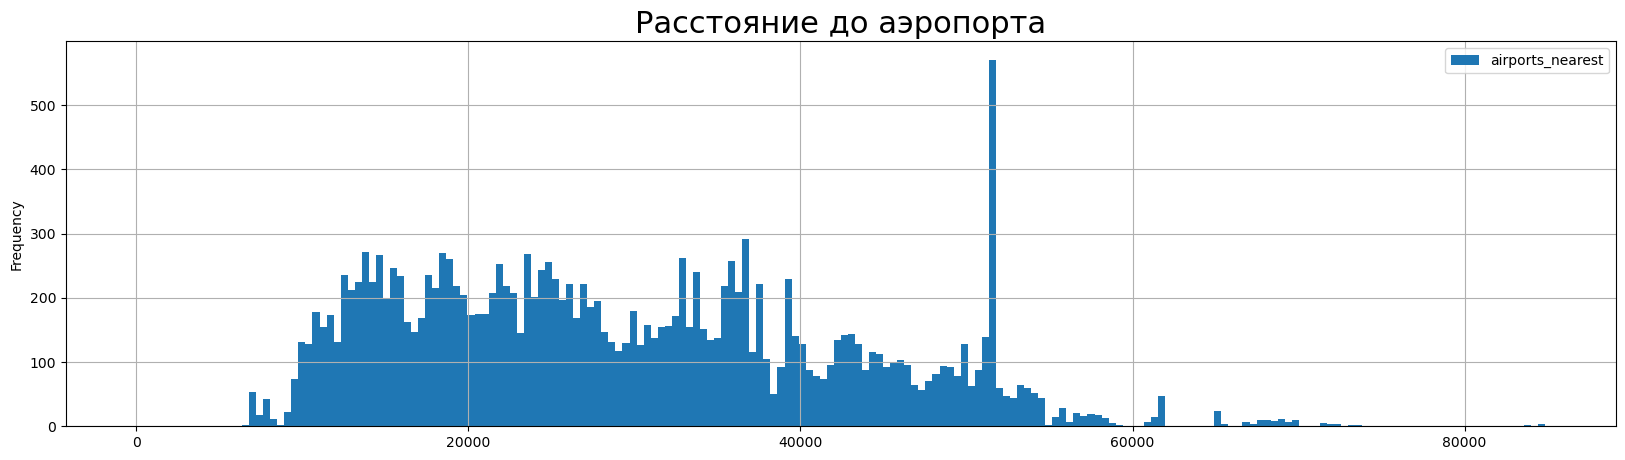

count    17635.000000
mean     29465.168188
std      13032.772675
min          0.000000
25%      18633.000000
50%      27442.000000
75%      38642.000000
max      84869.000000
Name: airports_nearest, dtype: float64 

Большая часть значений лежит в диапазоне от 18633.0 до 38642.0;
Встречаются выбросы, со значениями больше 68656.0


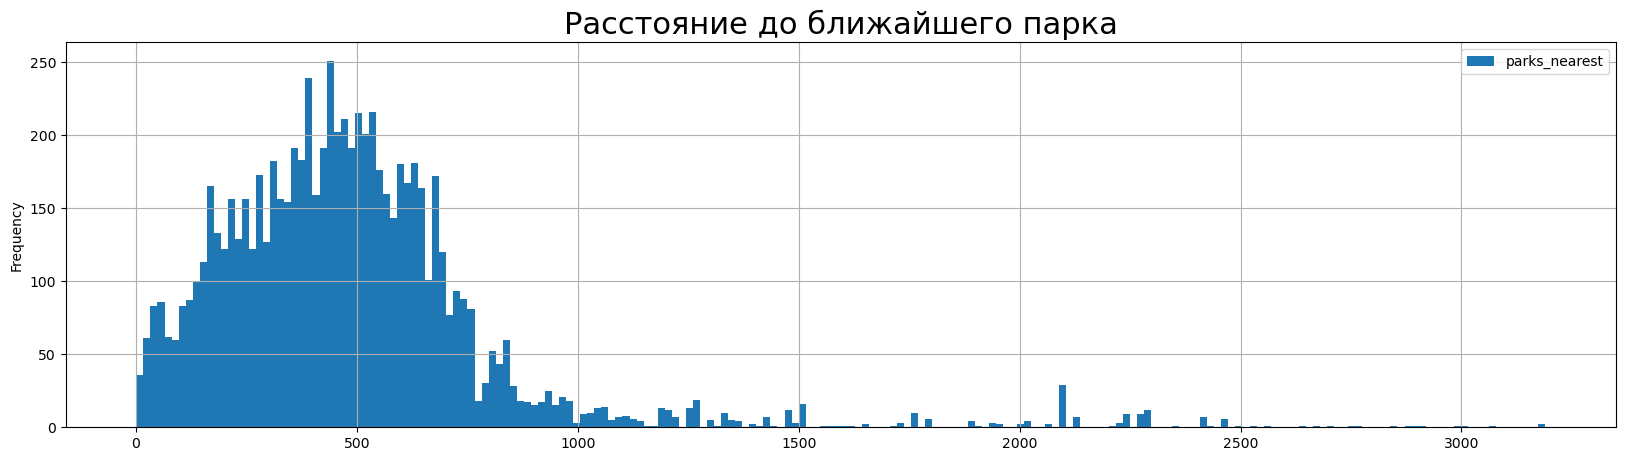

count    7635.000000
mean      491.265619
std       342.059440
min         1.000000
25%       288.000000
50%       455.000000
75%       613.000000
max      3190.000000
Name: parks_nearest, dtype: float64 

Большая часть значений лежит в диапазоне от 288.0 до 613.0;
Встречаются выбросы, со значениями больше 1100.0


In [243]:
for col_name, data in (df[['total_area','living_area','kitchen_area','last_price',
                           'rooms','ceiling_height','floor','floors_total',
                           'citycenters_nearest','airports_nearest','parks_nearest']].items()):
    df.plot(kind = 'hist', y = col_name, logy = False, grid = True, bins = 200, figsize = (20,5)).set_title(zag[col_name], fontsize = 22)
    plt.show()
    des = df[col_name].describe()
    ll = des['25%'] - (des['75%'] - des['25%']) * 1.5
    if ll < des['min']:
        ll = des['min']
    rl = des['75%'] + (des['75%'] - des['25%']) * 1.5
    if rl > des['max']:
        rl = des['max']
    print(df[col_name].describe(), '\n')
    if (des['75%'] - des['25%']) < 1:
        print(f'Большая часть значений лежит в диапазоне от {des["25%"].round(2)} до {des["75%"].round(2)};')
        if ll > des['min']:
            print(f'Встречаются выбросы, со значениями меньше {ll.round(2)}')
        if rl < des['max']:
            print(f'Встречаются выбросы, со значениями больше {rl.round(2)}')
    else:
        print(f'Большая часть значений лежит в диапазоне от {des["25%"].round()} до {des["75%"].round()};')
        if ll > des['min']:
            print(f'Встречаются выбросы, со значениями меньше {ll.round()}')
        if rl < des['max']:
            print(f'Встречаются выбросы, со значениями больше {rl.round()}')        

Отдельно выполняем построение и описания для параметра "Тип этажа", так как это не числовой параметр:

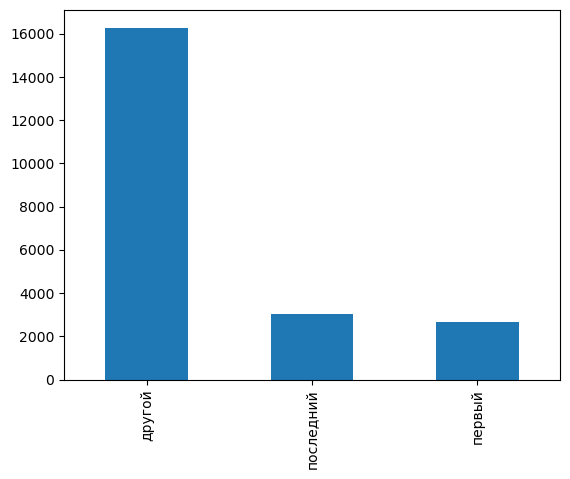

другой       16293
последний     3018
первый        2668
Name: type_floor, dtype: int64

In [244]:
df['type_floor'].value_counts().plot(kind = 'bar', x = 'type_floor')
plt.show()
df['type_floor'].value_counts()

Доля квартир на первом или последнем этаже значительно меньше, чем на остальных этажах. Доля квартир на последнем этаже немного выше, чем на превом этаже.

Выполняем построение и описания для параметра "День недели":

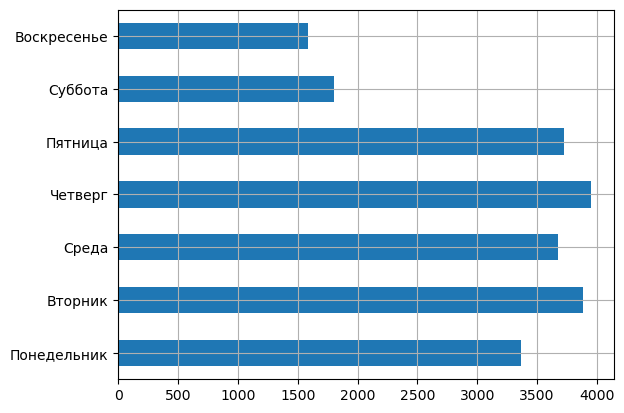

0    3365
1    3884
2    3675
3    3949
4    3723
5    1800
6    1583
Name: week_day, dtype: int64

In [245]:
(df['week_day'].value_counts().sort_index().rename({0: 'Понедельник',
                                                  1: 'Вторник', 2: 'Среда', 3: 'Четверг',
                                                  4: 'Пятница', 5: 'Суббота', 6: 'Воскресенье'})
                                                  .plot(kind = 'barh', x = 'week_day', grid = True))
plt.show()
df['week_day'].value_counts().sort_index()

В будний день в среднем квартир продается почти в 2 раза больше, чем в выходной день.

Построение и описание для параметра "Месяц", взяты только тогда, где данные присутствуют по всем месяцам:

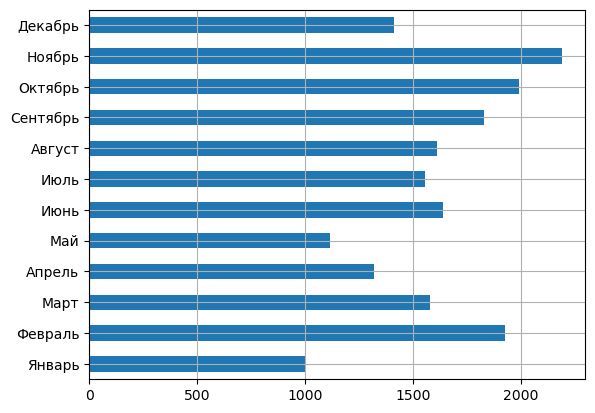

1     1398
2     2457
3     2393
4     2211
5     1174
6     1639
7     1557
8     1612
9     1832
10    1994
11    2206
12    1506
Name: month, dtype: int64

In [246]:
(df.query('2014 < year < 2019')['month'].value_counts().sort_index().rename({1: 'Январь', 2: 'Февраль', 3: 'Март',
                                                4: 'Апрель', 5: 'Май', 6: 'Июнь',
                                                7: 'Июль', 8: 'Август', 9: 'Сентябрь',
                                                10: 'Октябрь', 11: 'Ноябрь', 12: 'Декабрь'})
                                                  .plot(kind = 'barh', grid = True))
plt.show()
df['month'].value_counts().sort_index()

In [247]:
df.pivot_table(index = 'month', columns = 'year', values = 'first_day_exposition' , aggfunc = 'count')

year,2014,2015,2016,2017,2018,2019
month,,,,,,
1,NaN,53.0,116.0,271.0,562.0,396.0
2,NaN,44.0,235.0,413.0,1236.0,529.0
3,NaN,93.0,320.0,211.0,955.0,814.0
4,NaN,41.0,388.0,603.0,289.0,890.0
5,NaN,55.0,399.0,523.0,140.0,57.0
6,NaN,82.0,436.0,632.0,489.0,NaN
7,NaN,83.0,132.0,538.0,804.0,NaN
8,NaN,82.0,84.0,689.0,757.0,NaN
9,NaN,79.0,115.0,914.0,724.0,NaN


Максимальное количество продаж в среднем с 2015 по 2018 приходится на ноябрь, минимальное количество на май, так же наблюдается пик продаж в феврале за счет максимального количества продаж за месяц на всем исследуемом интервале времени в феврале 2018 года.

#### Анализ того, как быстро продавались квартиры.

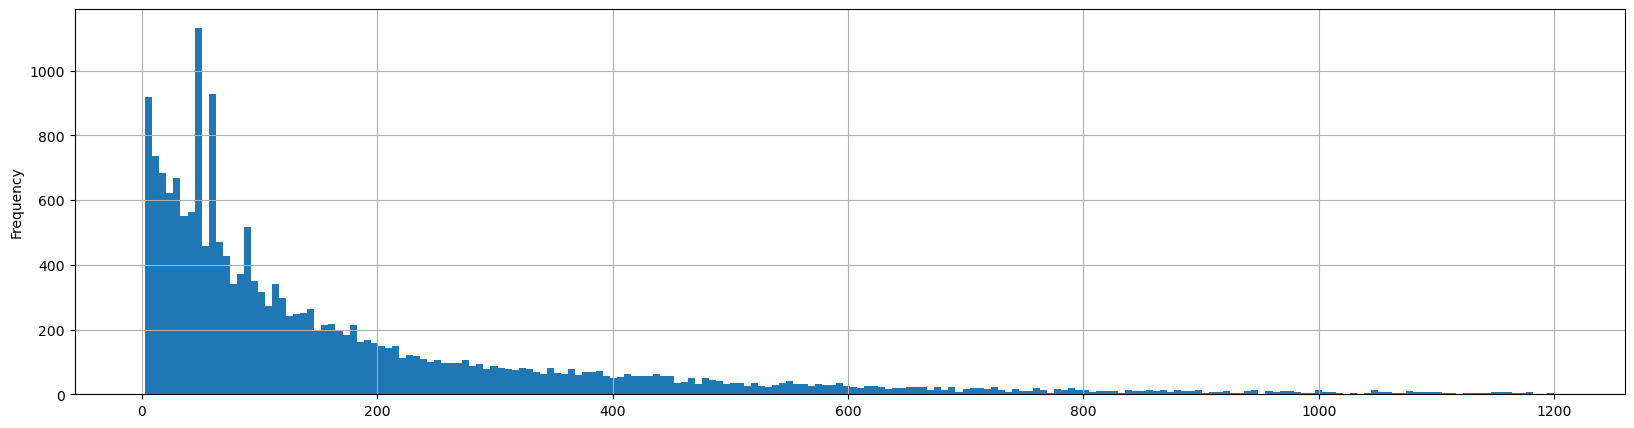

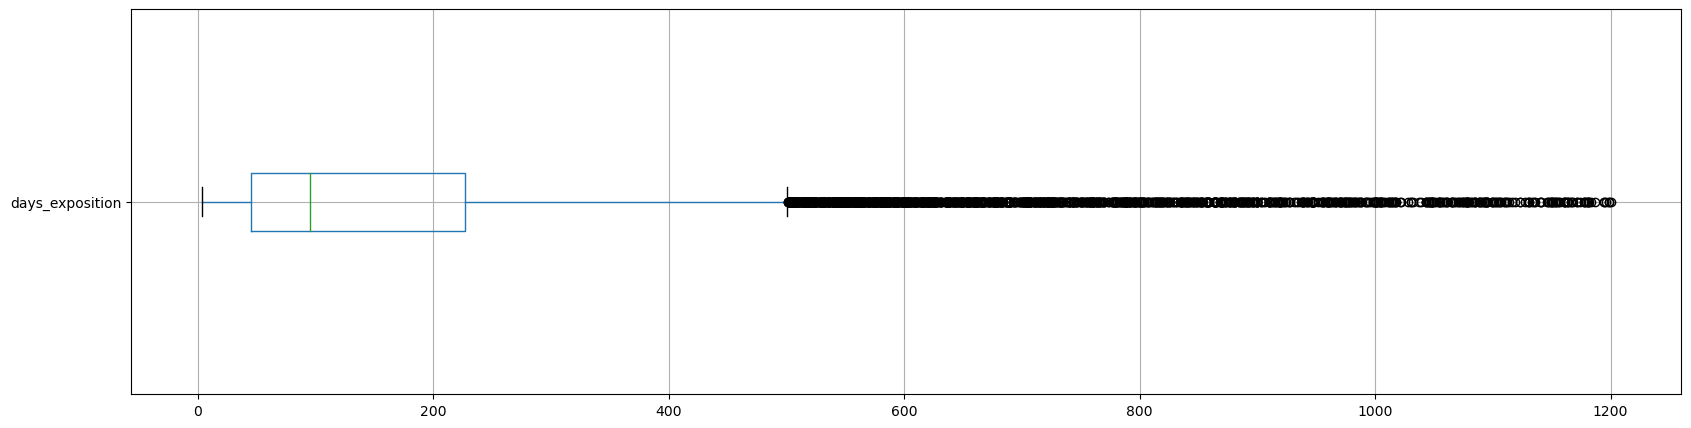

count    19056.000000
mean       175.639536
std        206.037711
min          3.000000
25%         45.000000
50%         95.000000
75%        227.000000
max       1200.000000
Name: days_exposition, dtype: float64 
 1100.5


45.0    779
60.0    521
7.0     214
30.0    196
90.0    187
Name: days_exposition, dtype: int64

In [248]:
df['days_exposition'].plot(kind = 'hist', bins = 200, figsize = (20,5), grid = True, logy = False)
plt.show()
df.boxplot(['days_exposition'], vert = False, figsize = (20,5))
plt.show()
des = df['days_exposition'].describe()
print(des, '\n', rl)
df['days_exposition'].value_counts().sort_values(ascending = False).head(5)




,year,days
0,2014,764.0
1,2015,552.0
2,2016,234.0
3,2017,103.0
4,2018,64.0
5,2019,24.0


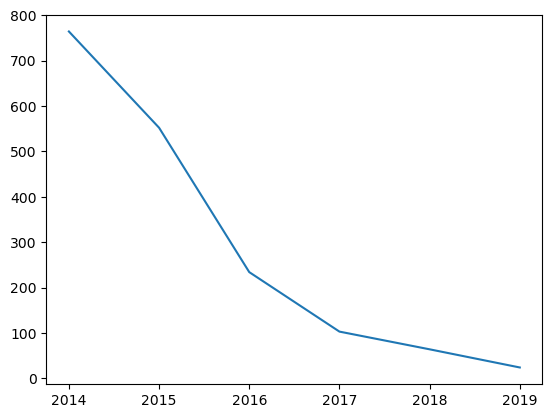

In [252]:
yr = []
for y in sorted(df['year'].unique()):
    yr.append(df.loc[df['year'] == y, 'days_exposition'].median())
yt = [2014, 2015, 2016, 2017, 2018, 2019]
plt.plot(yt,yr);
yy = list(zip(yt, yr)) 
yyy = pd.DataFrame(yy, columns=['year', 'days']) 
yyy

Среднее значение - 178 дней, медианное значение - 95 дней;

Быстрыми будут считаться квартиры, которые были проданы раньше 45 дней (минимум межквартильного размаха). Необычно долгими будут считаться продажи,превышающие значений 229 дней (максимум межквартильного размаха).

Наиболее часто квартиры продаюся на 45-й и на 60-й день продаж.

C 2014 по 2019 медианное значение скорости продаж упало с 737 до 24 дней, стоит учитывать что за в за 2014 и 2019 год данные не заполный год, результаты могут быть искажены.

#### Анализ влияния параметров объекта на его цену. 

##### Изучение влияния общей площади на цену.

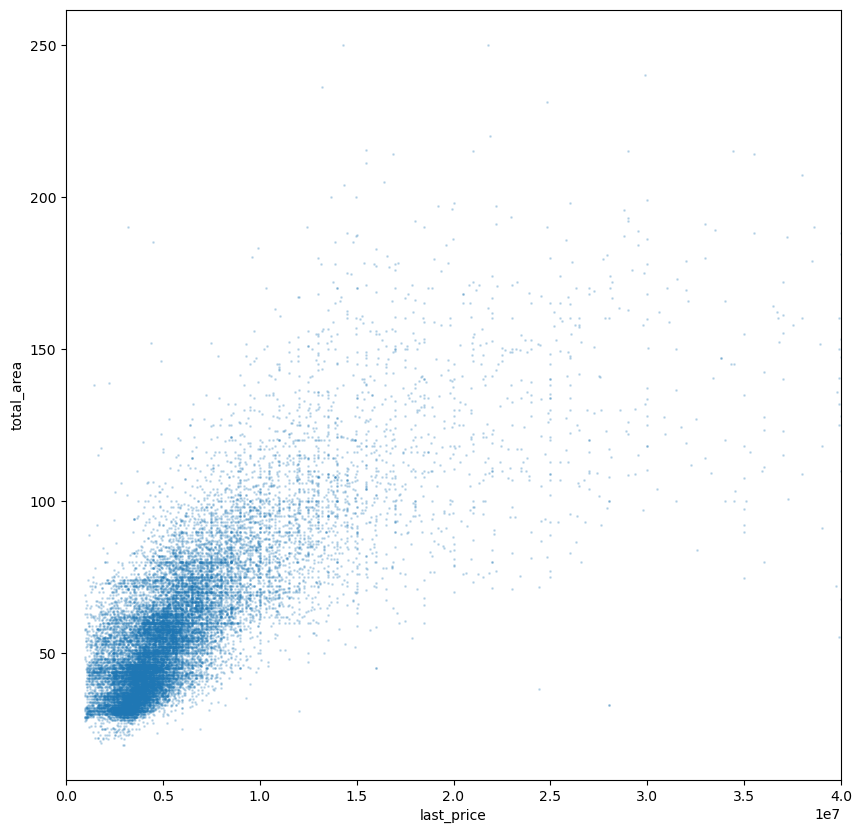

0.7423613815966563

In [253]:
df.plot.scatter(x = 'last_price', y = 'total_area', figsize = (10,10), alpha = 0.2, s = 1, xlim = (0,40000000))
plt.show()
df['last_price'].corr(df['total_area'])




Значение коэффициента корреляции Пирсона близко к 1, можно сделать вывод о том что между величиной общей площади и ценой существует прямая зависимость, близкая к линейной. Диаграмма рассеяния так же подтверждает данный вывод.

##### Изучение влияния жилой площади на цену.

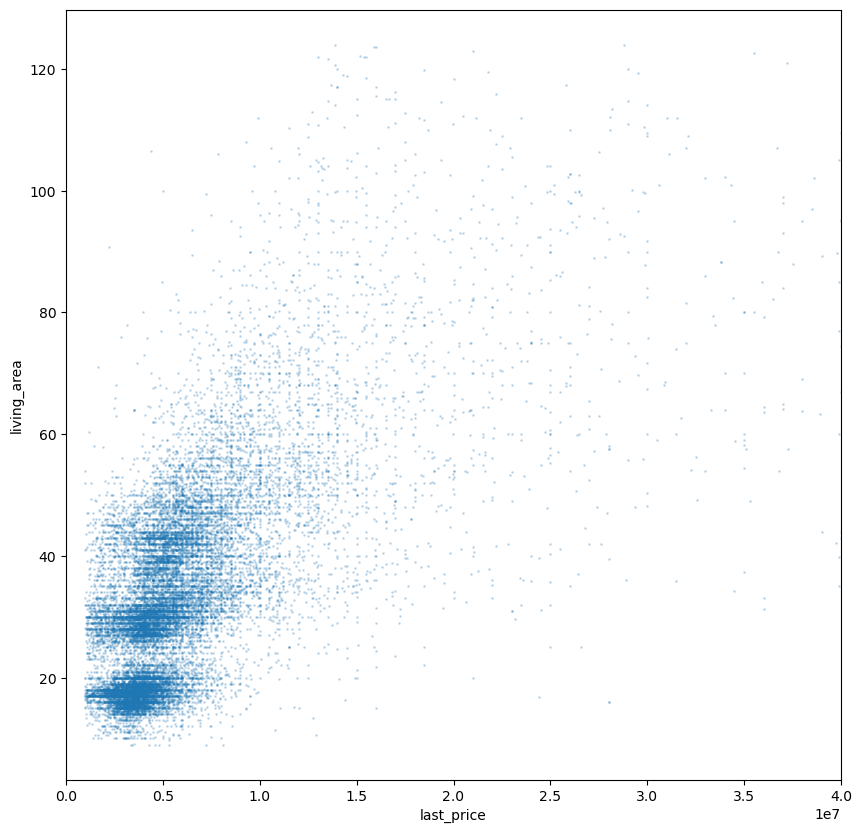

0.636483423172919

In [254]:
df.plot.scatter(x = 'last_price', y = 'living_area', figsize = (10,10), alpha = 0.2, s = 1.0, xlim = (0,40000000))
plt.show()
df['last_price'].corr(df['living_area'])

Значение коэффициента корреляции Пирсона больше 0, можно сделать вывод о том что между величиной жилой площади и ценой существует прямая зависимость, однако она не ярко выражена. Скопления точек горизонтальной формы на диаграме рассеяния указывает на то, что существуют типовые значения жилой площади, и цены имеют различные значения для данных величин, что может свидетельствовать о слабой связи между жилой площадью и ценой на объект.

##### Изучение влияния площади кухни на цену.

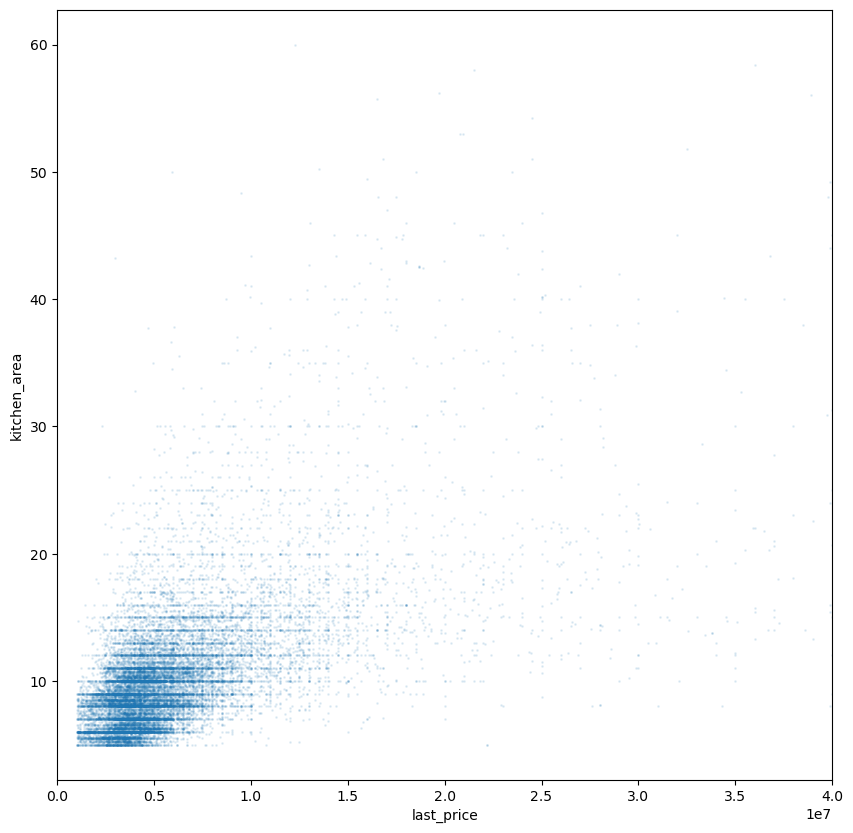

0.5697312400751583

In [255]:

df.plot.scatter(x = 'last_price', y = 'kitchen_area', figsize = (10,10), alpha = 0.1, s = 1.0, xlim = (0,40000000))
plt.show()
df['last_price'].corr(df['kitchen_area'])


Значение коэффициента корреляции Пирсона больше 0, можно сделать вывод о том что между величиной площади кухни и ценой существует прямая зависимость, однако она не ярко выражена. Скопления точек горизонтальной формы на диаграме рассеяния указывает на то, что существуют типовые значения площади кухни, и цены имеют различные значения для данных величин, что может свидетельствовать о слабой связи между площадью кухни и ценой на объект.

##### Изучение влияния количества комнат на цену.

       count      median
rooms                   
1       7466   3650000.0
2       7540   4800000.0
3       5566   6200000.0
4       1102   8855000.0
5        240  12500000.0
6         48  13165000.0
7         15  17500000.0
8          2  19145000.0


0.9889007301234132

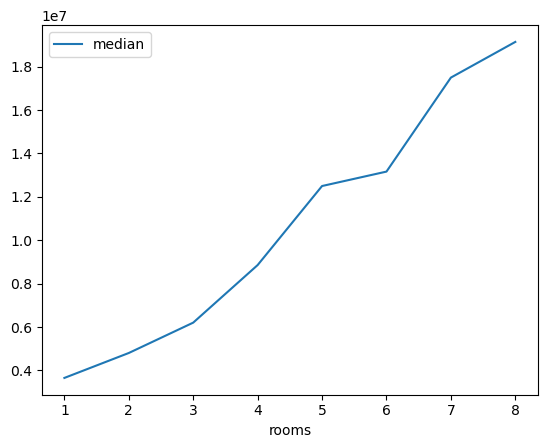

In [256]:
a = df.pivot_table(index = 'rooms', values = 'last_price', aggfunc = ('median', 'count'))
print(a)
a['rooms'] = a.index
a.plot(y = 'median')
a['median'].corr(a['rooms'])

Значение коэффициента корреляции Пирсона ≈ 1, можно сделать вывод о том что между количеством комнат и ценой существует прямая линейная зависимость.

##### Изучение влияния типа этажа, на котором расположен объект, на цену.

            last_price
type_floor            
другой       4900000.0
первый       4000000.0
последний    4350000.0


<Axes: xlabel='type_floor'>

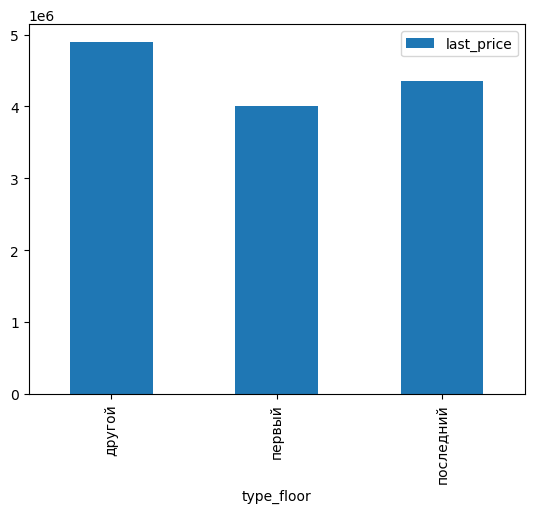

In [257]:
b = df.pivot_table(index = 'type_floor', values = 'last_price', aggfunc = 'median')
print(b)
b.plot(kind = 'bar')


Различие медианного значения цены объекта в зависимости от типа этажа около 10-13 %, можно сделать вывод о том, что тип этажа в значительной степени влияет на цену объекта: на первом этаже цена ниже всего, последнем этаже цена немного выше, на остальных этажах цена значительно выше.

##### Изучение влияния дня недели, когда было размещено объявление, на цену.

             last_price
week_day               
Понедельник   4700000.0
Вторник       4800000.0
Среда         4750000.0
Четверг       4700000.0
Пятница       4600000.0
Суббота       4600003.0
Воскресенье   4600000.0


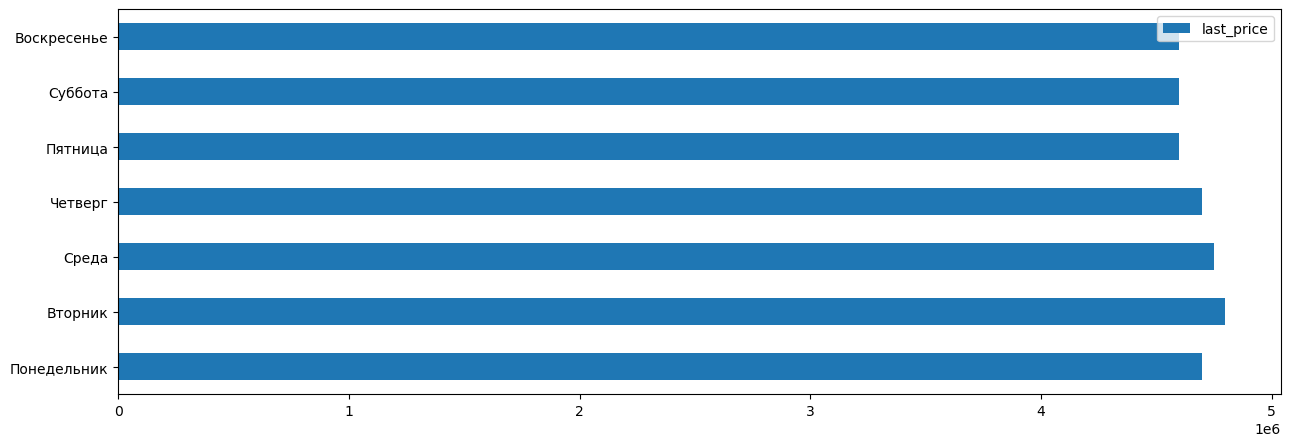

In [258]:
c = df.pivot_table(index = 'week_day', values = 'last_price', aggfunc = 'median').rename({0: 'Понедельник',
                                                  1: 'Вторник', 2: 'Среда', 3: 'Четверг',
                                                  4: 'Пятница', 5: 'Суббота', 6: 'Воскресенье'})
print(c)
c.plot(kind = 'barh', figsize = (15,5))
plt.ylabel('');

Столбчатая диаграмма показывает, что максимальное медианное значение цены во вторник, затем идет плавное снижение до минимального значения в воскресенье, разница между макимальным и минимальным значением составляет около 4 %, можно сделать вывод о том, существует что день недели, когда было размещено объявление оказывает влияние на цену.

##### Изучение месяца, когда было размещено объявление, на цену.

          last_price
month               
Январь     4650000.0
Февраль    4700000.0
Март       4700000.0
Апрель     4850000.0
Май        4600000.0
Июнь       4500000.0
Июль       4700000.0
Август     4650000.0
Сентябрь   4750000.0
Октябрь    4600000.0
Ноябрь     4700000.0
Декабрь    4700000.0


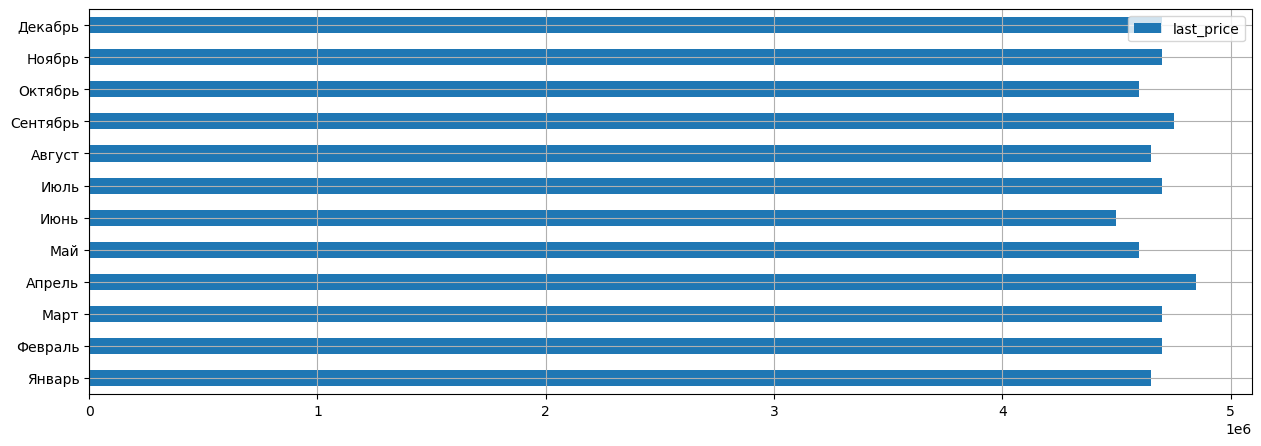

In [259]:
d = df.pivot_table(index = 'month', values = 'last_price', aggfunc = 'median').rename({1: 'Январь', 2: 'Февраль', 3: 'Март',
                                                4: 'Апрель', 5: 'Май', 6: 'Июнь',
                                                7: 'Июль', 8: 'Август', 9: 'Сентябрь',
                                                10: 'Октябрь', 11: 'Ноябрь', 12: 'Декабрь'})
print(d)
d.plot(kind = 'barh', figsize = (15,5), grid = True)
plt.ylabel('');

Столбчатая диаграмма показывает, что максимальное значение медианы цены в апреле, минимальное значение в июне, разница между макимальным и минимальным значением составляет около 6 %.

##### Изучение года, когда было размещено объявление, на цену.

      last_price  total_area  count
year                               
2014   7476560.0        75.5    109
2015   5200000.0        59.2   1041
2016   4600000.0        54.0   2573
2017   4530000.0        52.0   7638
2018   4650000.0        51.0   7932
2019   5100000.0        52.0   2686


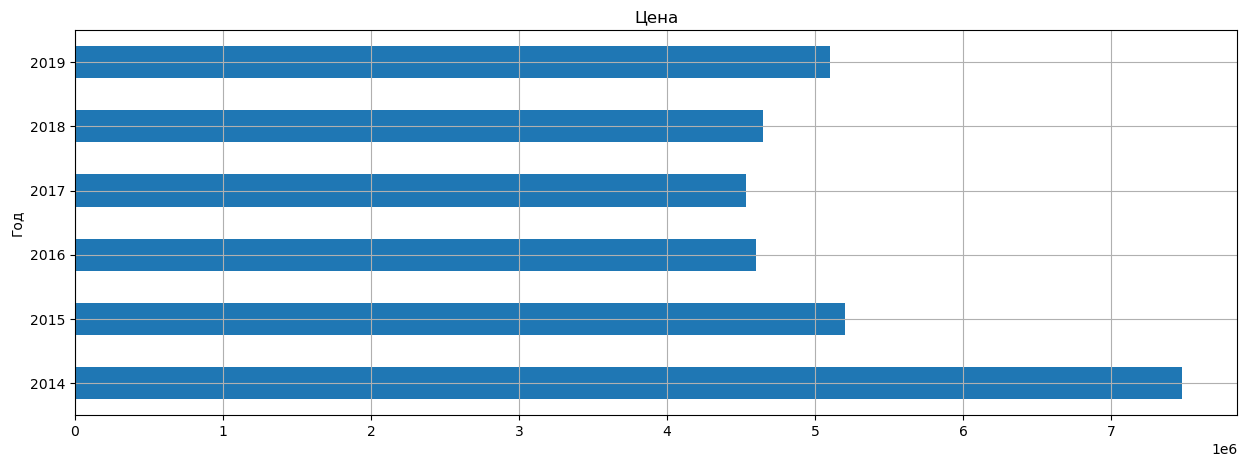

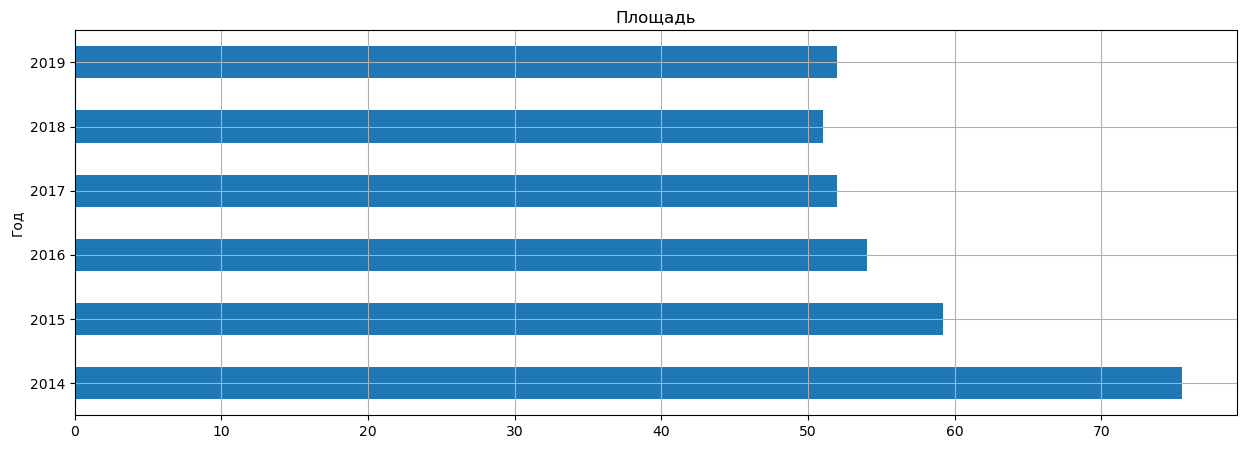

Text(0.5, 1.0, 'Количество объявлений')

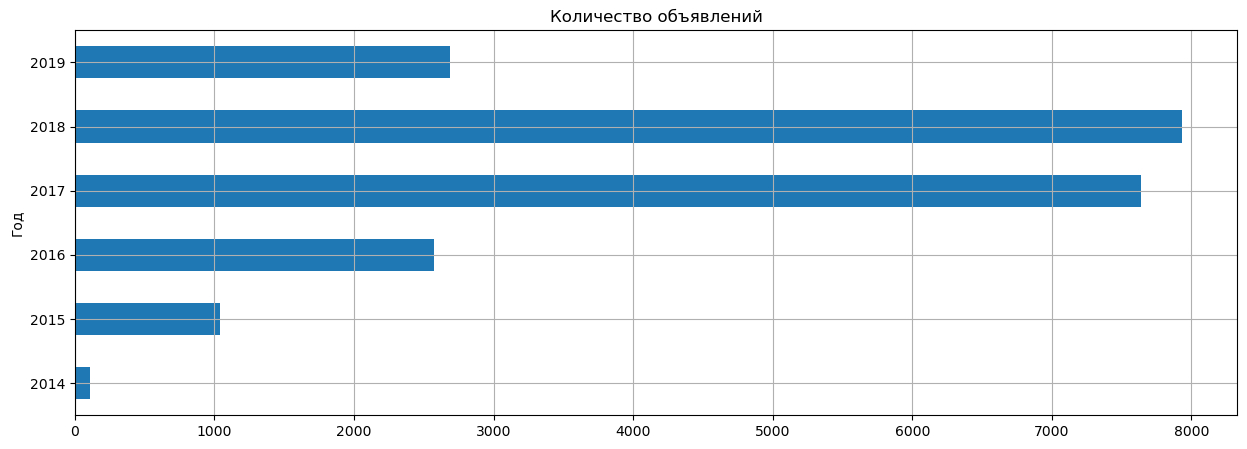

In [260]:
e = df.pivot_table(index = 'year', values = ('last_price', 'total_area'), aggfunc = ['median', 'count'])
e.columns = ['last_price', 'total_area', 'count', 'count2']
e = e.drop('count2', axis=1)
print(e)
e['last_price'].plot(kind = 'barh', grid = True, figsize = (15,5), ylabel = 'Год')
plt.title('Цена')
plt.show()
e['total_area'].plot(kind = 'barh', grid = True, figsize = (15,5), ylabel = 'Год')
plt.title('Площадь')
plt.show()
e['count'].plot(kind = 'barh', grid = True, figsize = (15,5), ylabel = 'Год');
plt.title('Количество объявлений')

Столбчатые диаграммы изменения средней цены и средней площади продаваемых квартир практически пропорциональны, можно сделать вывод о том средняя стоимость квартир с 2014 по 2019 год не изменялась. Рост количества объявлений наблюдался до максимального количества в 2018 году, затем пошел спад.

#### Оперделение цены 1 м2 в 10 самых крупных городах.

                 count     median
locality_name                    
Выборг             205   59090.91
Всеволожск         376   65843.50
Гатчина            271   67924.53
Колпино            335   74722.22
Шушары             427   76666.67
Мурино             448   84209.32
Парголово          260   90373.33
Кудрово            423   95000.00
Пушкин             350  100000.00
Санкт-Петербург  14870  104123.24


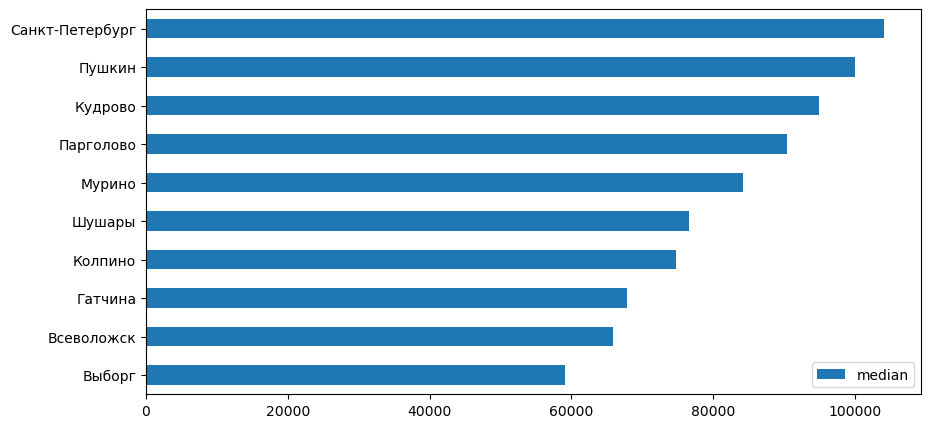

In [261]:
print(df.pivot_table(index = 'locality_name', values = 'price_1m2', aggfunc = ('median', 'count'))
              .sort_values('count').tail(10).sort_values('median').round(2))
(df.pivot_table(index = 'locality_name', values = 'price_1m2', aggfunc = ('median', 'count'))
              .sort_values('count').tail(10).sort_values('median')).plot(kind = 'barh', y = 'median', figsize = (10,5))
plt.ylabel('');


Самая высокая цена за 1 м2 в Санкт-Петербурге - 104072 руб;
Самая низкая цена за 1 м2 в Выборге - 59090 руб.

#### Анализ  влияния расстояния до центра города на стоимость объекта.

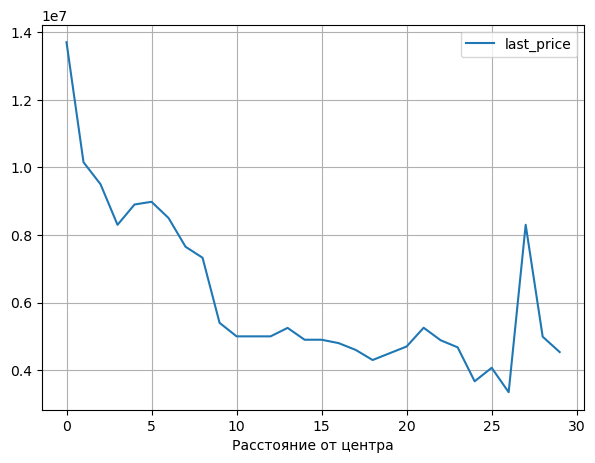

               median  count
center_km                   
0.0        13700000.0     18
1.0        10150000.0    154
2.0         9500000.0    258
3.0         8299500.0    312
4.0         8900000.0    619
5.0         8980000.0    811
6.0         8500000.0    550
7.0         7650000.0    400
8.0         7325000.0    566
9.0         5400000.0    579
10.0        5000000.0    694
11.0        5000000.0   1146
12.0        5000000.0   1555
13.0        5250000.0   1412
14.0        4900000.0   1236
15.0        4900000.0   1516
16.0        4800000.0   1240
17.0        4600000.0    839
18.0        4300000.0    252
19.0        4500000.0    150
20.0        4700000.0     19
21.0        5254738.0    110
22.0        4885000.0    197
23.0        4675000.0     74
24.0        3670000.0     20
25.0        4070000.0     23
26.0        3347500.0     48
27.0        8300000.0      2
28.0        4990000.0      7
29.0        4535000.0      6 

Среднее изменение цены за 1 км2 - 210000.0


In [262]:
import statistics as st
j = df[df['locality_name'] == 'Санкт-Петербург'].pivot_table(index = df['center_km'].round(), 
                                                             values = 'last_price', aggfunc = ['median', 'count'])
j.plot(grid = True, figsize = (7,5), y = 'median', xlabel = 'Расстояние от центра')
plt.show()
j.columns = ['median', 'count']
print(j, '\n')
g = []
for i in range(6,(len(j)-1)):
    g.append(j.loc[i, 'median'] - j.loc[i+1, 'median'])
print('Среднее изменение цены за 1 км2 -' , st.median(g))


In [263]:
km3 = df.loc[(df['locality_name'] == 'Санкт-Петербург') & (df['center_km'].round() == 3), 'type_floor'].value_counts()
km5 = df.loc[(df['locality_name'] == 'Санкт-Петербург') & (df['center_km'].round() == 5), 'type_floor'].value_counts()
print(km3, '\n', km5)

другой       190
последний     71
первый        51
Name: type_floor, dtype: int64 
 другой       619
последний    118
первый        74
Name: type_floor, dtype: int64


В среднем отдаление от центра города в Санкт-Петербурге на 1 км снижает стоимость объекта на 210 тыс руб. На 3-м километре наблюдается провал в цене, потому что на более 50% квартир на данном интервале находятся на первом или последнем этаже, на которых стоимость ниже, чем на остальных этажах, тогда как на 5-м километре доля таких квартир менее 30%. На расстоянии 27 км наблюдается резкий скачок цены, однако из-за малого количества данных (2 объявления) результаты на данном интервале могут быть искажены.

### Общий вывод

Для проведения исследования были взяты данные сервиса "Яндекс недвижимость". В ходе выполнения предобработки данных были выявлены и устранены следующие ошибки:

- Исправлен регистр в названии стобцов;

- Отфильтрованы неявные дубликаты в названиях населенных пунктов;

- Выявлены и исправлены аномальные значения в параметрах "цена", "высота потолков";

- Заполнены пропуски в параметрах "высота потолков", "количество этажей", "жилая площадь", "площадь кухни", "аппартаменты", "площадь балкона", "расстояние до аэропорта", "расстояние до центра", "количество парков в радиусе 3 км", "количество прудов в радиусе 3 км";

- Значения в параметре "сколько дней было размещено объявление".

- Для каждого исследуемого параметра были определены границы аномальных значений и таким образом были отфильтрованы выбросы.

В ходе проведения исследования были созданы и определены следующие параметры: 

- Цена за 1 м2;

- День недели, когда было размещено объявление;

- Месяц, когда было размещено объявление;

- Год, когда было размещено объявление;

- Тип этажа квартиры;

- Расстояние до центра города, выраженное в километрах.

В ходе проведения исследовательского анализа данных были построены гистограммы и даны числовые описания распределений основных параметров: "общая площадь", "жилая площадь", "площадь кухни", "цена объекта", "количество комнат", "высота потолков", "этаж квартиры", "тип этажа квартиры", "общее количество этажей в доме", "расстояние до центра города", "расстояние до ближайшего аэропорта", "расстояние до ближайшего парка", "день и месяц публикации объявления". 

Был проведен анализ скорости продаж квартиры. Были сделаны следующие выводы:
Среднее значение - 178 дней, медианное значение - 95 дней. Быстрыми будут считаться квартиры, которые были проданы раньше 45 дней, долгими будут считаться продажи,превышающие значений 229 дней. Наиболее часто квартиры продаюся на 45-й и на 60-й день продаж. C 2014 по 2019 медианное значение скорости продаж упало с 737 до 24 дней. 

В ходе проведения исследовательского анализа были сделаны следующие выводы:

- Между величиной общей площади и ценой существует прямая зависимость, достаточно близкая к линейной - коэффициент корреляции Пирсона равен 0.74;

- Между величиной жилой площади и ценой существует прямая зависимость, однако она не ярко выражена - коэффициент корреляции Пирсона равен 0.64;

- Между величиной жилой площади и ценой существует прямая зависимость, выражена меньше всего - коэффициент корреляции Пирсона равен 0.57;

- Между количеством комнат и ценой существует прямая линейная зависимость - коэффициент корреляции Пирсона равен 0.98;

- Тип этажа в значительной степени влияет на цену объекта: на первом этаже цена ниже всего, последнем этаже цена немного выше, на остальных этажах цена выше на 10-18 %;

- Была обнаружена зависимость, по которой цена объекта снижается в течении недели со вторника по воскресенье суммарно на 4 %;

- Максимальное значение медианы цены в апреле, минимальное значение в июне, разница между макимальным и минимальным значением составляет около 6 %.

- Средняя стоимость квартир с 2014 по 2019 год не изменялась. Рост количества объявлений наблюдался до максимального количества в 2018 году, затем пошел спад.

- Среди 10 крупнейших городов самая высокая цена за 1 м2 в Санкт-Петербурге - 104072 руб, самая низкая цена за 1 м2 в Выборге - 59090 руб.

- В среднем отдаление от центра города в Санкт-Петербурге на 1 км снижает стоимость объекта на 210 тыс руб.





